# Importing Libraries and Loading Dataset



In [3]:
# Importing necessary libraries
import pandas as pd
import streamlit as st
import matplotlib.pyplot as plt
from datasets import load_dataset
from adjustText import adjust_text
import seaborn as sns
import re
from datetime import datetime
import plotly.express as px
%matplotlib inline

# loading the dataset
health = pd.read_csv(r"C:\Users\DELL\Desktop\Regonet_project\healthcare_dataset.csv")

# Creating a copy of the dataset
health_1 = health.copy()

health_1.sample(10, random_state=42)

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
31641,mIchAEl thOrnTon mD,57,Male,O+,Diabetes,9/15/2023,Jason Hanson,Thornton-Roy,Medicare,3616.898450,339,Elective,10/2/2023,Aspirin,Inconclusive
9246,mattheW HUTcHiNsOn,51,Female,A+,Diabetes,10/7/2023,Jesse Gonzalez,Wilkerson-Lewis,Aetna,36970.075480,372,Emergency,10/14/2023,Penicillin,Abnormal
1583,RoNald paRK,20,Male,A+,Asthma,9/9/2019,Sarah Hernandez,Brown-Hughes,Blue Cross,44393.001350,148,Elective,10/8/2019,Penicillin,Inconclusive
36506,Jeff BroOkS,74,Female,B+,Obesity,9/14/2020,Cathy Sanchez,"Wilson, Alexander Wolf and",Aetna,27554.923710,135,Emergency,9/21/2020,Ibuprofen,Abnormal
11259,TAnya THoMPsOn,56,Male,AB-,Obesity,2/1/2023,Nancy Lee,"Winters, Blackburn Chandler and",Aetna,27466.318570,284,Emergency,2/7/2023,Paracetamol,Inconclusive
8972,EThan MItcHELL,46,Male,B+,Cancer,12/30/2021,Christina Hart,Rocha-Wagner,Medicare,4802.620714,175,Elective,1/27/2022,Paracetamol,Abnormal
36078,AMBer WRiGHt,44,Female,O+,Asthma,5/13/2023,Melissa Stephens,Friedman-Douglas,Blue Cross,40207.463220,336,Elective,6/9/2023,Paracetamol,Inconclusive
42659,mORGAn lAWreNce,46,Male,B-,Diabetes,6/20/2023,Paul Hansen,"Wells and Davila Cooper,",Medicare,30065.260600,212,Elective,7/16/2023,Ibuprofen,Abnormal
6545,MackEnZiE MAxwEll,64,Female,AB-,Arthritis,8/3/2019,Thomas Pratt,"and Alvarez, Cox Powers",Cigna,392.913548,113,Urgent,8/15/2019,Ibuprofen,Inconclusive
35448,Cindy ROGeRS,68,Male,B-,Cancer,3/15/2022,Calvin George,"Conley Jackson, and Hill",Medicare,20886.342150,274,Urgent,4/14/2022,Penicillin,Normal


# Dataset Inspection

In [4]:
health_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood Type          55500 non-null  object 
 4   Medical Condition   55500 non-null  object 
 5   Date of Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance Provider  55500 non-null  object 
 9   Billing Amount      55500 non-null  float64
 10  Room Number         55500 non-null  int64  
 11  Admission Type      55500 non-null  object 
 12  Discharge Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

In [5]:
# Dispaying columns
health_1.columns

Index(['Name', 'Age', 'Gender', 'Blood Type', 'Medical Condition',
       'Date of Admission', 'Doctor', 'Hospital', 'Insurance Provider',
       'Billing Amount', 'Room Number', 'Admission Type', 'Discharge Date',
       'Medication', 'Test Results'],
      dtype='object')

# Data Cleaning

## RemRemoving extra leading and trailing spaces from text-based columns 

In [6]:
# Removing extra leading and trailing spaces from text-based columns
for col in health_1.select_dtypes(include='object'):
    health_1[col] = health_1[col].map(lambda x: re.sub(r'\s+', ' ', x).strip() if isinstance(x,str) else x)

## Renaming columns to comply with Python Naming Convention

In [7]:
health_1.rename(columns={'Blood Type': 'Blood_Type','Medical Condition': 'Medical_Condition', 
                         'Date of Admission': 'Date_of_Admission', 'Insurance Provider': 'Insurance_Provider',
                         'Billing Amount': 'Billing_Amount','Room Number':'Room_Number',
                         'Admission Type':'Admission_Type', 'Discharge Date': 'Discharge_Date',
                         'Test Results':'Test_Results'
}, inplace=True)

## Checking the raw data in health dataset

In [8]:
for index, row in health_1[['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results']].head(20).iterrows():
    print(f"""Name: {repr(row['Name'])}, Age: {repr(row['Age'])}, Gender: {repr(row['Gender'])},
           Blood_Type: {repr(row['Blood_Type'])}, Medical_Condition: {repr(row['Medical_Condition'])},
           Date_of_Admission: {repr(row['Date_of_Admission'])}, Doctor: {repr(row['Doctor'])},
           Hospital: {repr(row['Hospital'])}, Insurance_Provider: {repr(row['Insurance_Provider'])},
           Billing_Amount: {repr(row['Billing_Amount'])}, Room_Number: {repr(row['Room_Number'])},
           Admission_Type: {repr(row['Admission_Type'])},Discharge_Date: {repr(row['Discharge_Date'])},
           Medication: {repr(row['Medication'])}, Test_Results: {repr(row['Test_Results'])}""")

Name: 'Bobby JacksOn', Age: 30, Gender: 'Male',
           Blood_Type: 'B-', Medical_Condition: 'Cancer',
           Date_of_Admission: '1/31/2024', Doctor: 'Matthew Smith',
           Hospital: 'Sons and Miller', Insurance_Provider: 'Blue Cross',
           Billing_Amount: 18856.28131, Room_Number: 328,
           Admission_Type: 'Urgent',Discharge_Date: '2/2/2024',
           Medication: 'Paracetamol', Test_Results: 'Normal'
Name: 'LesLie TErRy', Age: 62, Gender: 'Male',
           Blood_Type: 'A+', Medical_Condition: 'Obesity',
           Date_of_Admission: '8/20/2019', Doctor: 'Samantha Davies',
           Hospital: 'Kim Inc', Insurance_Provider: 'Medicare',
           Billing_Amount: 33643.32729, Room_Number: 265,
           Admission_Type: 'Emergency',Discharge_Date: '8/26/2019',
           Medication: 'Ibuprofen', Test_Results: 'Inconclusive'
Name: 'DaNnY sMitH', Age: 76, Gender: 'Female',
           Blood_Type: 'A-', Medical_Condition: 'Obesity',
           Date_of_Admission: '

In [9]:
health_1.columns

Index(['Name', 'Age', 'Gender', 'Blood_Type', 'Medical_Condition',
       'Date_of_Admission', 'Doctor', 'Hospital', 'Insurance_Provider',
       'Billing_Amount', 'Room_Number', 'Admission_Type', 'Discharge_Date',
       'Medication', 'Test_Results'],
      dtype='object')

## Converting the name column to a title case

In [10]:
# Converting the name coulmn to title case
health_1['Name'] = health_1['Name'].str.title()

health_1['Name'].head(20)

0           Bobby Jackson
1            Leslie Terry
2             Danny Smith
3            Andrew Watts
4           Adrienne Bell
5           Emily Johnson
6          Edward Edwards
7      Christina Martinez
8         Jasmine Aguilar
9        Christopher Berg
10       Michelle Daniels
11         Aaron Martinez
12          Connor Hansen
13           Robert Bauer
14           Brooke Brady
15     Ms. Natalie Gamble
16          Haley Perkins
17    Mrs. Jamie Campbell
18           Luke Burgess
19         Daniel Schmidt
Name: Name, dtype: object

## Converting the Date of Admission and Discharge Date to datatime format

In [11]:
# Converting the Date of Admission and Discharge Date to datetime format
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce').dt.strftime('%Y-%m-%d')
health_1['Discharge_Date'] = pd.to_datetime(health_1['Discharge_Date'], errors='coerce').dt.strftime('%Y-%m-%d')
print(health_1[['Date_of_Admission','Discharge_Date']].head(20)) 

   Date_of_Admission Discharge_Date
0         2024-01-31     2024-02-02
1         2019-08-20     2019-08-26
2         2022-09-22     2022-10-07
3         2020-11-18     2020-12-18
4         2022-09-19     2022-10-09
5         2023-12-20     2023-12-24
6         2020-11-03     2020-11-15
7         2021-12-28     2022-01-07
8         2020-07-01     2020-07-14
9         2021-05-23     2021-06-22
10        2020-04-19     2020-04-22
11        2023-08-13     2023-09-05
12        2019-12-12     2019-12-28
13        2020-05-22     2020-06-19
14        2021-10-08     2021-10-13
15        2023-01-01     2023-01-11
16        2020-06-23     2020-07-14
17        2020-03-08     2020-04-02
18        2021-03-04     2021-03-14
19        2022-11-15     2022-11-22


##  Cleaning Hospital Column

In [12]:
# Printing the raw values on Company Name Column
for val in health_1['Hospital'].head(20):
    print(repr(val))

'Sons and Miller'
'Kim Inc'
'Cook PLC'
'Hernandez Rogers and Vang,'
'White-White'
'Nunez-Humphrey'
'Group Middleton'
'Powell Robinson and Valdez,'
'Sons Rich and'
'Padilla-Walker'
'Schaefer-Porter'
'Lyons-Blair'
'Powers Miller, and Flores'
'Rivera-Gutierrez'
'Morris-Arellano'
'Cline-Williams'
'Cervantes-Wells'
'Torres, and Harrison Jones'
'Houston PLC'
'Hammond Ltd'


In [13]:
# cleaning the Hospital column by removing commas and extra spaces
health_1['Hospital'] = (
    health_1['Hospital']
    .str.replace(',', '', regex=False)   # Remove commas
    .str.strip()                         # Remove leading/trailing spaces
)

health_1['Hospital'].head(20)

0                Sons and Miller
1                        Kim Inc
2                       Cook PLC
3      Hernandez Rogers and Vang
4                    White-White
5                 Nunez-Humphrey
6                Group Middleton
7     Powell Robinson and Valdez
8                  Sons Rich and
9                 Padilla-Walker
10               Schaefer-Porter
11                   Lyons-Blair
12      Powers Miller and Flores
13              Rivera-Gutierrez
14               Morris-Arellano
15                Cline-Williams
16               Cervantes-Wells
17     Torres and Harrison Jones
18                   Houston PLC
19                   Hammond Ltd
Name: Hospital, dtype: object

## Converting the Billing Amount Column to 2 Decimal Places

In [14]:
health_1['Billing_Amount'] = health_1['Billing_Amount'].round(2)
health_1['Billing_Amount'].head(10)

0    18856.28
1    33643.33
2    27955.10
3    37909.78
4    14238.32
5    48145.11
6    19580.87
7    45820.46
8    50119.22
9    19784.63
Name: Billing_Amount, dtype: float64

## Checking the Final Heathcare Dataset After Cleaning

In [15]:
health_1.sample(30, random_state=42)

,Name,Age,Gender,Blood_Type,Medical_Condition,Date_of_Admission,Doctor,Hospital,Insurance_Provider,Billing_Amount,Room_Number,Admission_Type,Discharge_Date,Medication,Test_Results
31641,Michael Thornton Md,57,Male,O+,Diabetes,2023-09-15,Jason Hanson,Thornton-Roy,Medicare,3616.90,339,Elective,2023-10-02,Aspirin,Inconclusive
9246,Matthew Hutchinson,51,Female,A+,Diabetes,2023-10-07,Jesse Gonzalez,Wilkerson-Lewis,Aetna,36970.08,372,Emergency,2023-10-14,Penicillin,Abnormal
1583,Ronald Park,20,Male,A+,Asthma,2019-09-09,Sarah Hernandez,Brown-Hughes,Blue Cross,44393.00,148,Elective,2019-10-08,Penicillin,Inconclusive
36506,Jeff Brooks,74,Female,B+,Obesity,2020-09-14,Cathy Sanchez,Wilson Alexander Wolf and,Aetna,27554.92,135,Emergency,2020-09-21,Ibuprofen,Abnormal
11259,Tanya Thompson,56,Male,AB-,Obesity,2023-02-01,Nancy Lee,Winters Blackburn Chandler and,Aetna,27466.32,284,Emergency,2023-02-07,Paracetamol,Inconclusive
8972,Ethan Mitchell,46,Male,B+,Cancer,2021-12-30,Christina Hart,Rocha-Wagner,Medicare,4802.62,175,Elective,2022-01-27,Paracetamol,Abnormal
36078,Amber Wright,44,Female,O+,Asthma,2023-05-13,Melissa Stephens,Friedman-Douglas,Blue Cross,40207.46,336,Elective,2023-06-09,Paracetamol,Inconclusive
42659,Morgan Lawrence,46,Male,B-,Diabetes,2023-06-20,Paul Hansen,Wells and Davila Cooper,Medicare,30065.26,212,Elective,2023-07-16,Ibuprofen,Abnormal
6545,Mackenzie Maxwell,64,Female,AB-,Arthritis,2019-08-03,Thomas Pratt,and Alvarez Cox Powers,Cigna,392.91,113,Urgent,2019-08-15,Ibuprofen,Inconclusive
35448,Cindy Rogers,68,Male,B-,Cancer,2022-03-15,Calvin George,Conley Jackson and Hill,Medicare,20886.34,274,Urgent,2022-04-14,Penicillin,Normal


In [16]:
health_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55500 entries, 0 to 55499
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                55500 non-null  object 
 1   Age                 55500 non-null  int64  
 2   Gender              55500 non-null  object 
 3   Blood_Type          55500 non-null  object 
 4   Medical_Condition   55500 non-null  object 
 5   Date_of_Admission   55500 non-null  object 
 6   Doctor              55500 non-null  object 
 7   Hospital            55500 non-null  object 
 8   Insurance_Provider  55500 non-null  object 
 9   Billing_Amount      55500 non-null  float64
 10  Room_Number         55500 non-null  int64  
 11  Admission_Type      55500 non-null  object 
 12  Discharge_Date      55500 non-null  object 
 13  Medication          55500 non-null  object 
 14  Test_Results        55500 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 6.4

# VISUALIZATION

### Accessing Gender Disparities in the Prevalence of Medical Conditions

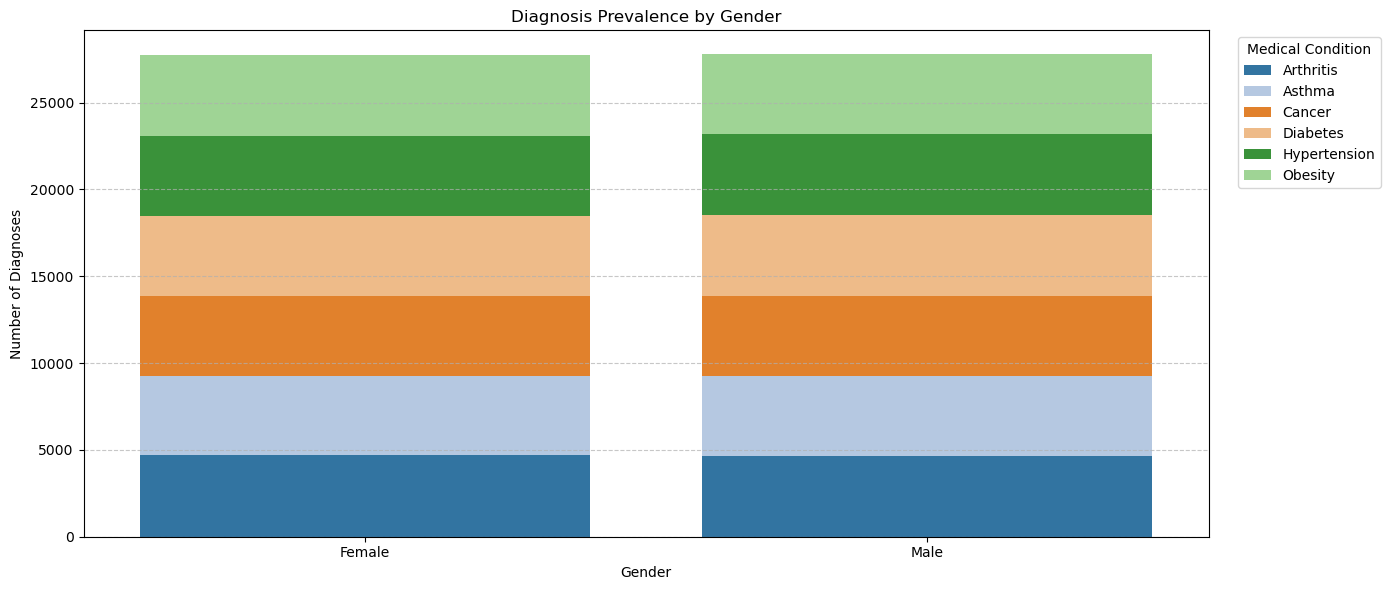

**Insights:**
1. The most prevalent medical condition is **Arthritis** with **9308** total diagnoses.
2. **Asthma** shows the greatest gender disparity with a difference of **79** diagnoses.
3. The least diagnosed condition is **Asthma**, with only **9185** cases recorded.

**Recommendations:**
1. Increase resource allocation for **Arthritis** — including screening, education, and chronic care.
2. Investigate possible causes for gender disparity in **Asthma**, such as access barriers or cultural stigma.
3. Assess whether **Asthma** is genuinely rare or underdiagnosed due to low screening rates or awareness.


In [17]:

# Converting  admission date to datetime
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce')

# Creating Age Group
bins = [0, 18, 35, 50, 65, 80, 120]
labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
health_1['Age_Group'] = pd.cut(health_1['Age'], bins=bins, labels=labels, right=False)

# Counting diagnosis by Gender and Medical Condition
grouped = (
    health_1.groupby(['Gender', 'Medical_Condition'], observed=True)
    .size()
    .reset_index(name='Count')
)

plt.figure(figsize=(14, 6))
palette = sns.color_palette("tab20", n_colors=grouped['Medical_Condition'].nunique())

# Using pandas crosstab to plot stacked bars
pivot_df = pd.crosstab(health_1['Gender'], health_1['Medical_Condition'])

# Plotting of stacked bars
bottom = pd.Series([0]*len(pivot_df), index=pivot_df.index)
for i, condition in enumerate(pivot_df.columns):
    sns.barplot(x=pivot_df.index, y=pivot_df[condition], label=condition,
                bottom=bottom, color=palette[i])
    bottom += pivot_df[condition]
    
plt.title("Diagnosis Prevalence by Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Diagnoses")
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Positioning of legend
plt.legend(title='Medical Condition', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 5: Automatically generate insights and recommendations
insights = []
recommendations = []

# Insight 1: Most prevalent condition
condition_totals = health_1['Medical_Condition'].value_counts()
most_common_condition = condition_totals.idxmax()
most_common_count = condition_totals.max()
insights.append(
    f"1. The most prevalent medical condition is **{most_common_condition}** with **{most_common_count}** total diagnoses."
)
recommendations.append(
    f"1. Increase resource allocation for **{most_common_condition}** — including screening, education, and chronic care."
)

# Insight 2: Diagnosis with greatest gender gap
gender_condition_ct = pd.crosstab(health_1['Medical_Condition'], health_1['Gender'])
gender_disparity = (gender_condition_ct.max(axis=1) - gender_condition_ct.min(axis=1)).sort_values(ascending=False)
top_disparity_condition = gender_disparity.index[0]
gap_value = gender_disparity.iloc[0]
insights.append(
    f"2. **{top_disparity_condition}** shows the greatest gender disparity with a difference of **{gap_value}** diagnoses."
)
recommendations.append(
    f"2. Investigate possible causes for gender disparity in **{top_disparity_condition}**, such as access barriers or cultural stigma."
)

# Insight 3: Least prevalent condition
least_common_condition = condition_totals.idxmin()
least_common_count = condition_totals.min()
insights.append(
    f"3. The least diagnosed condition is **{least_common_condition}**, with only **{least_common_count}** cases recorded."
)
recommendations.append(
    f"3. Assess whether **{least_common_condition}** is genuinely rare or underdiagnosed due to low screening rates or awareness."
)

# Step 6: Display insights and recommendations
print("**Insights:**")
for insight in insights:
    print(insight)

print("\n**Recommendations:**")
for rec in recommendations:
    print(rec)

### Identifying Underserved Demographics Across Patient Populations

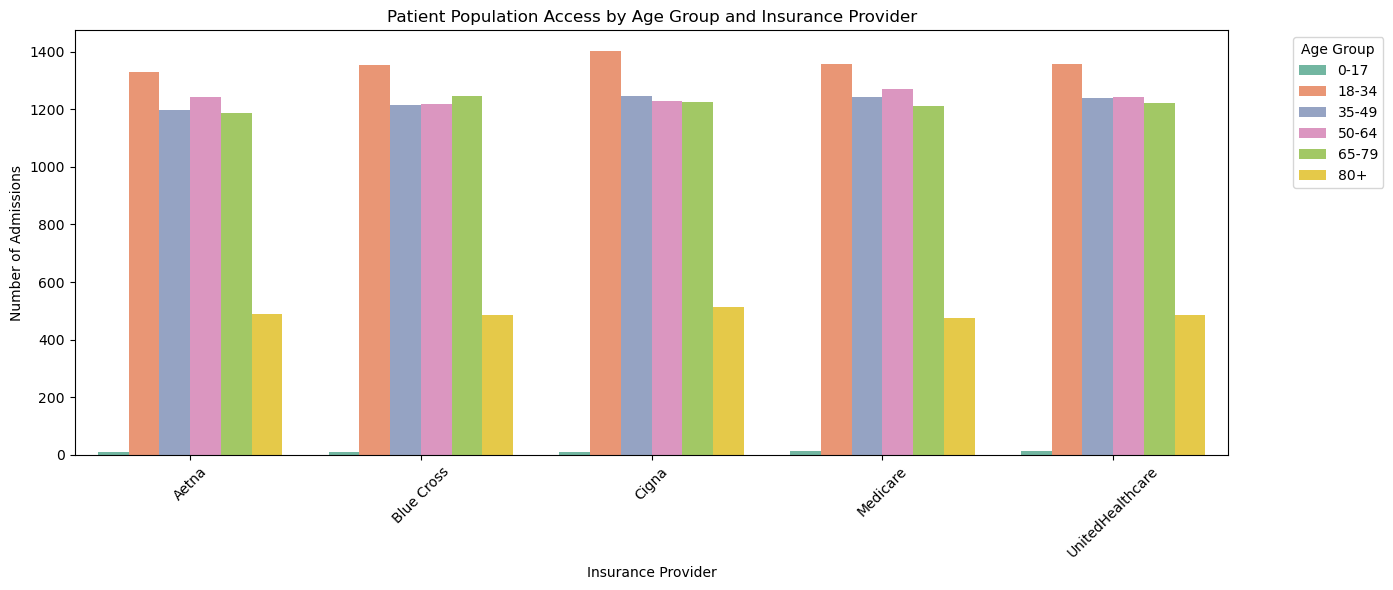

**Insights:**
1. The lowest access was observed among **Female** patients aged **0-17** under **Aetna**, with only **6** recorded admissions.
2. The age group with overall lowest utilization is **0-17**, with only **116** total admissions across all genders and insurance providers.
3. **Aetna** has the lowest total patient engagement, with only **10913** admissions recorded.

**Recommendations:**
1. Investigate barriers (e.g., cost, cultural beliefs, transport) for **Female** patients aged **0-17** with **Aetna**. Offer tailored outreach programs.
2. Consider creating awareness or mobile care services targeting individuals aged **0-17**.
3. Collaborate with **Aetna** to assess member access issues and improve coverage incentives.


C:\Users\DELL\AppData\Local\Temp\ipykernel_13872\2533240064.py:59: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_totals = grouped.groupby('Age_Group')['Admission_Count'].sum().sort_values()


In [18]:

# Converting Date_of_Admission to datetime
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce')

# Creating Age Group column
bins = [0, 18, 35, 50, 65, 80, 120]
labels = ['0-17', '18-34', '35-49', '50-64', '65-79', '80+']
health_1['Age_Group'] = pd.cut(health_1['Age'], bins=bins, labels=labels, right=False)

# Grouping by Age, Gender, Insurance
grouped = (
    health_1.groupby(['Age_Group', 'Gender', 'Insurance_Provider'], observed=True)
    .size()
    .reset_index(name='Admission_Count')
)

# Defining color palette
palette = sns.color_palette("Set2", len(labels))

# Plotting of  bar chart
plt.figure(figsize=(14, 6))
sns.barplot(
    data=grouped,
    x='Insurance_Provider',
    y='Admission_Count',
    hue='Age_Group',
    palette=palette,
    errorbar=None 
)

plt.title("Patient Population Access by Age Group and Insurance Provider")
plt.xlabel("Insurance Provider")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.legend(title="Age Group", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 6: Generate insights and recommendations
insights = []
recommendations = []

# Insight 1: Lowest served group
lowest = grouped.sort_values(by='Admission_Count').iloc[0]
low_age = lowest['Age_Group']
low_gender = lowest['Gender']
low_insurance = lowest['Insurance_Provider']
low_count = lowest['Admission_Count']

insights.append(
    f"1. The lowest access was observed among **{low_gender}** patients aged **{low_age}** under **{low_insurance}**, "
    f"with only **{low_count}** recorded admissions."
)
recommendations.append(
    f"1. Investigate barriers (e.g., cost, cultural beliefs, transport) for **{low_gender}** patients aged **{low_age}** "
    f"with **{low_insurance}**. Offer tailored outreach programs."
)

# Insight 2: Age group with lowest total access
age_totals = grouped.groupby('Age_Group')['Admission_Count'].sum().sort_values()
lowest_age_group = age_totals.index[0]
lowest_age_total = age_totals.min()

insights.append(
    f"2. The age group with overall lowest utilization is **{lowest_age_group}**, "
    f"with only **{lowest_age_total}** total admissions across all genders and insurance providers."
)
recommendations.append(
    f"2. Consider creating awareness or mobile care services targeting individuals aged **{lowest_age_group}**."
)

# Insight 3: Insurance provider with lowest reach
insurance_totals = grouped.groupby('Insurance_Provider')['Admission_Count'].sum().sort_values()
lowest_insurance = insurance_totals.index[0]
lowest_insurance_total = insurance_totals.min()

insights.append(
    f"3. **{lowest_insurance}** has the lowest total patient engagement, with only **{lowest_insurance_total}** admissions recorded."
)
recommendations.append(
    f"3. Collaborate with **{lowest_insurance}** to assess member access issues and improve coverage incentives."
)

# Step 7: Display insights and recommendations
print("**Insights:**")
for item in insights:
    print(item)

print("\n**Recommendations:**")
for item in recommendations:
    print(item)


### Comparing Emergency and Elective Admissions to Assess Service Strain

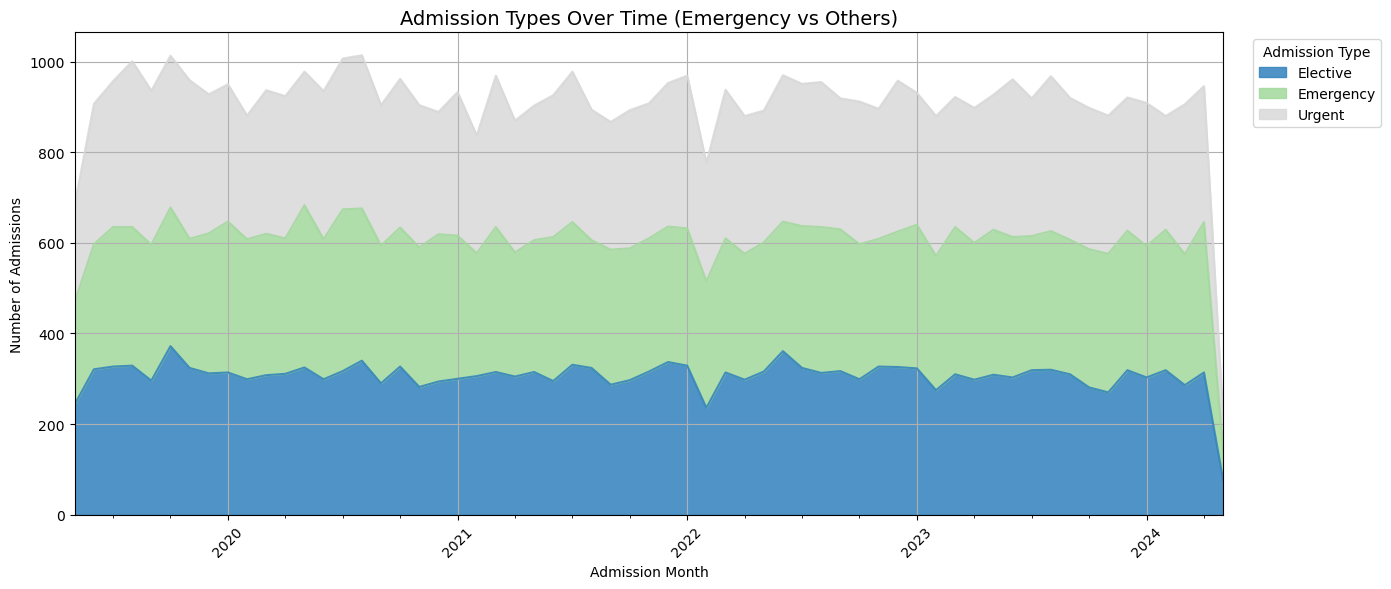

**Insights:**
1. Emergency admissions peaked in **May 2020** with **358** cases, which is above the average monthly emergency admission of **299**.

**Recommendations:**
1. Examine what occurred in **May 2020** to drive the spike. Consider adding more non-emergency capacity or triage to better manage future peaks.


In [19]:

# Converting  Date_of_Admission to datetime
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce')

# Creating a monthly column
health_1['Admission_Month'] = health_1['Date_of_Admission'].dt.to_period('M').astype(str)

# Grouping by month and Admission_Type
monthly_counts = (
    health_1.groupby(['Admission_Month', 'Admission_Type'], observed=True)
    .size()
    .reset_index(name='Count')
)

# Pivotting for area chart
pivot_df = monthly_counts.pivot(index='Admission_Month', columns='Admission_Type', values='Count').fillna(0)
pivot_df.index = pd.to_datetime(pivot_df.index)

# Plotting of  stacked area chart
fig, ax = plt.subplots(figsize=(14, 6))
pivot_df.plot(kind='area', stacked=True, colormap='tab20c', alpha=0.85, ax=ax)

plt.title("Admission Types Over Time (Emergency vs Others)", fontsize=14)
plt.xlabel("Admission Month")
plt.ylabel("Number of Admissions")
plt.xticks(rotation=45)
plt.grid(True)

# Moving of  legend outside the plot
plt.legend(title='Admission Type', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Step 7: Generate multiple insights and recommendations
insights = []
recommendations = []

# Insight 1: Emergency peak detection
if 'Emergency' in pivot_df.columns:
    peak_month = pivot_df['Emergency'].idxmax().strftime('%B %Y')
    peak_value = int(pivot_df['Emergency'].max())
    avg_emergency = int(pivot_df['Emergency'].mean())
    insights.append(
        f"1. Emergency admissions peaked in **{peak_month}** with **{peak_value}** cases, "
        f"which is above the average monthly emergency admission of **{avg_emergency}**."
    )
    recommendations.append(
        f"1. Examine what occurred in **{peak_month}** to drive the spike. "
        f"Consider adding more non-emergency capacity or triage to better manage future peaks."
    )

# Insight 2: Emergency dominance ratio
total_admissions = pivot_df.sum(axis=1)
if 'Emergency' in pivot_df.columns:
    emergency_ratio = (pivot_df['Emergency'] / total_admissions).mean()
    if emergency_ratio > 0.5:
        insights.append(
            f"2. On average, **{emergency_ratio:.0%}** of all admissions were emergency-related—indicating a possible overreliance."
        )
        recommendations.append(
            f"2. Invest in community-based care, chronic disease management, and appointment availability "
            f"to help reduce emergency dependency."
        )

# Insight 3: Growth trend in Emergency admissions
if len(pivot_df) >= 3:
    early_avg = pivot_df['Emergency'].iloc[:3].mean() if 'Emergency' in pivot_df.columns else 0
    late_avg = pivot_df['Emergency'].iloc[-3:].mean() if 'Emergency' in pivot_df.columns else 0
    if late_avg > early_avg:
        insights.append(
            f"3. Emergency admissions have grown from a **{int(early_avg)}** monthly average to **{int(late_avg)}** recently, "
            f"showing a rising trend."
        )
        recommendations.append(
            f"3. Plan for increased emergency demand or identify upstream causes—like population growth, seasonal surges, or systemic gaps."
        )

# Fallback if not enough Emergency data
if not insights:
    insights.append("1. No Emergency admission data available in the dataset.")
    recommendations.append("1. Check the quality and completeness of Admission_Type entries, especially for Emergency.")

# Step 8: Display insights and recommendations
print("**Insights:**")
for item in insights:
    print(item)

print("\n**Recommendations:**")
for item in recommendations:
    print(item)


### Accessing Ward Capacity Utilization Rate

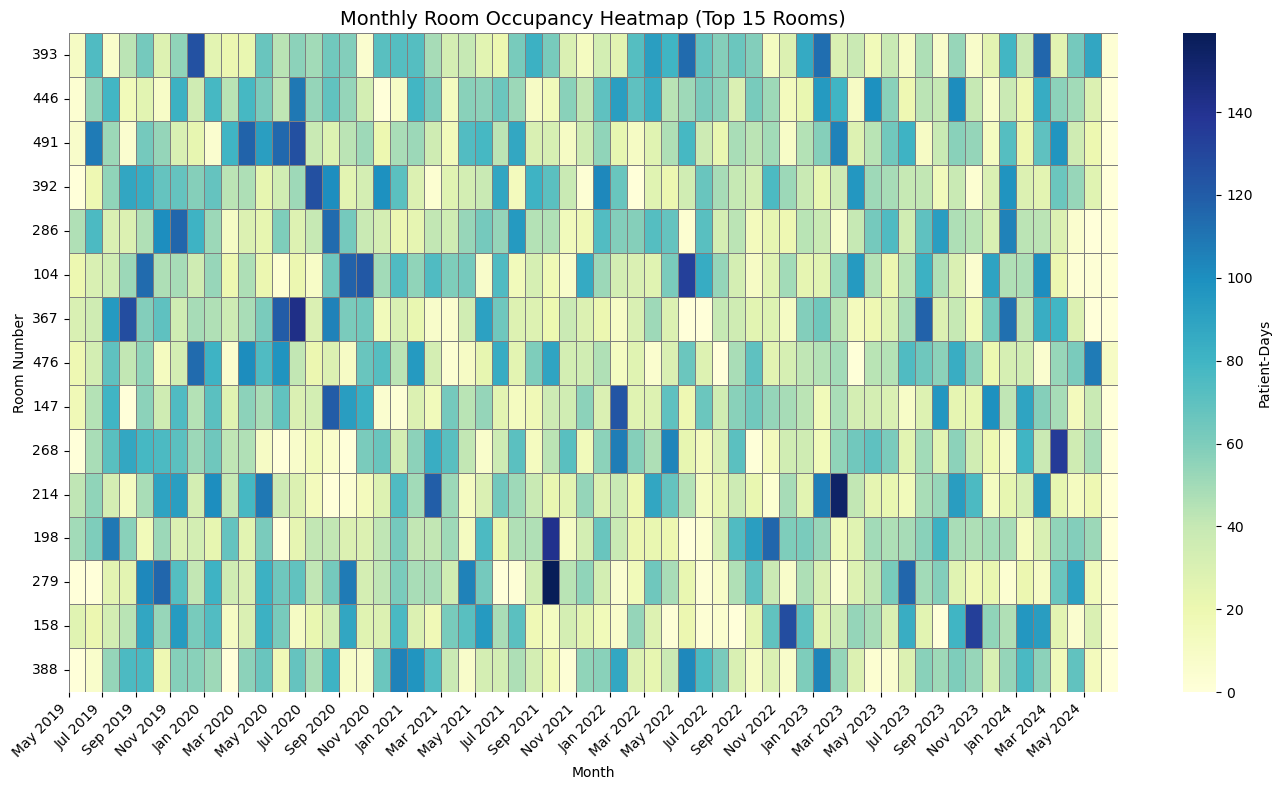

**Insights:**
1. Room **393** had the highest occupancy over the observed period with **3050** patient-days.
2. Room **388** had the lowest occupancy with only **2739** patient-days.
3. The busiest month was **September 2019**, with **976** total patient-days across rooms.

**Recommendations:**
1. Consider redistributing traffic or replicating facilities in **Room 393** to prevent overuse.
2. Investigate **Room 388** for possible operational issues (e.g., equipment, staffing, isolation).
3. Plan staffing and infrastructure adjustments for high-traffic periods like **September 2019**.


In [21]:

# Ensuring datetime datatypes
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce')
health_1['Discharge_Date'] = pd.to_datetime(health_1['Discharge_Date'], errors='coerce')

# Expanding into daily occupancy logs
room_stays = []
for _, row in health_1.iterrows():
    for day in pd.date_range(row['Date_of_Admission'], row['Discharge_Date']):
        room_stays.append({'Room_Number': str(row['Room_Number']), 'Date': day})

occupancy_df = pd.DataFrame(room_stays)

# Aggregating by Months
occupancy_df['Month'] = occupancy_df['Date'].dt.to_period('M').dt.to_timestamp()

# Creating pivot table
pivot_df = (
    occupancy_df.groupby(['Room_Number', 'Month'])
    .size()
    .unstack(fill_value=0)
)

# Keeping only top 15 busiest rooms
top_rooms = pivot_df.sum(axis=1).sort_values(ascending=False).head(15).index
pivot_df = pivot_df.loc[top_rooms]

# Plotting heatmap with month-based date axis
plt.figure(figsize=(14, 8))
ax = sns.heatmap(pivot_df, cmap="YlGnBu", linewidths=0.4, linecolor='gray', cbar_kws={'label': 'Patient-Days'})

# Customizing x-tick labels (Month-Year)
dates = pivot_df.columns.to_list()
formatted_labels = [d.strftime('%b %Y') for d in dates]

# Reducing clutter by showing every 1–2 months
skip = 1 if len(formatted_labels) <= 10 else 2
selected_locs = list(range(0, len(dates), skip))
selected_labels = [formatted_labels[i] for i in selected_locs]

ax.set_xticks(selected_locs)
ax.set_xticklabels(selected_labels, rotation=45, ha='right')

plt.title("Monthly Room Occupancy Heatmap (Top 15 Rooms)", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Room Number")
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

# Step 8: Insights & Recommendations
insights = []
recommendations = []

room_totals = pivot_df.sum(axis=1)
most_used_room = room_totals.idxmax()
most_used_count = room_totals.max()
insights.append(
    f"1. Room **{most_used_room}** had the highest occupancy over the observed period with **{most_used_count}** patient-days."
)
recommendations.append(
    f"1. Consider redistributing traffic or replicating facilities in **Room {most_used_room}** to prevent overuse."
)

least_used_room = room_totals.idxmin()
least_used_count = room_totals.min()
insights.append(
    f"2. Room **{least_used_room}** had the lowest occupancy with only **{least_used_count}** patient-days."
)
recommendations.append(
    f"2. Investigate **Room {least_used_room}** for possible operational issues (e.g., equipment, staffing, isolation)."
)

monthly_totals = pivot_df.sum(axis=0)
busiest_month = monthly_totals.idxmax().strftime('%B %Y')
busiest_total = monthly_totals.max()
insights.append(
    f"3. The busiest month was **{busiest_month}**, with **{busiest_total}** total patient-days across rooms."
)
recommendations.append(
    f"3. Plan staffing and infrastructure adjustments for high-traffic periods like **{busiest_month}**."
)

# Step 9: Display insights and recommendations
print("**Insights:**")
for insight in insights:
    print(insight)

print("\n**Recommendations:**")
for recommendation in recommendations:
    print(recommendation)


### Analyzing which Medical Conditions Generate the Highest Costs

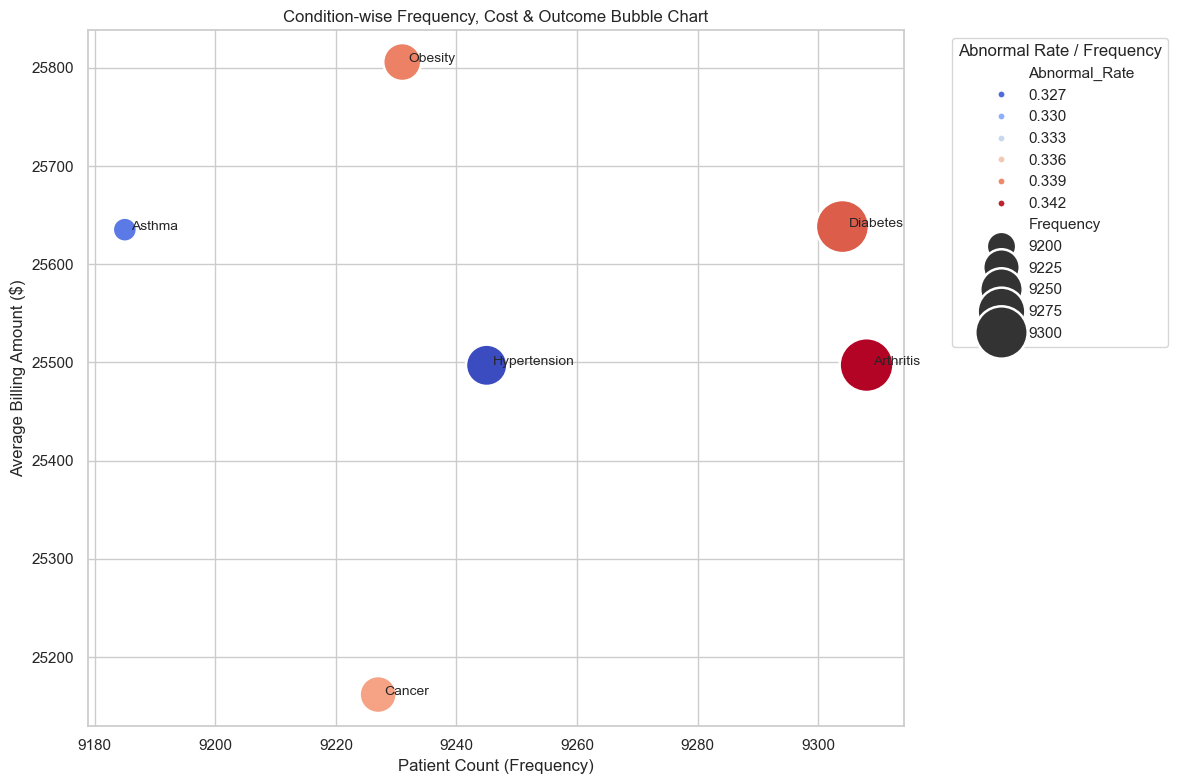

Insights:
1. **Arthritis** is the most common condition with **9308** patients.
2. **Obesity** has the highest average billing at **$25805.97**.
3. **Arthritis** shows the highest abnormal outcome rate at **34.3%**.

Recommendations:
1. Preventative campaigns for **Arthritis** could reduce long-term admissions.
2. Conduct a billing audit and care-pathway optimization for **Obesity**.
3. Review clinical guidelines and aftercare plans for **Arthritis**.


In [ ]:
# Summarizing by Medical Condition
condition_summary = (
   health_1.groupby('Medical_Condition')
    .agg(
        Frequency=('Medical_Condition', 'count'),
        Avg_Billing_Amount=('Billing_Amount', 'mean'),
        Abnormal_Rate=('Abnormal_Flag', 'mean')
    )
    .reset_index()
)

# Plotting Bubble Chart (Frequency vs Billing, size = Frequency, hue = Abnormal Rate)
plt.figure(figsize=(12, 8))
bubble = sns.scatterplot(
    data=condition_summary,
    x='Frequency',
    y='Avg_Billing_Amount',
    size='Frequency',
    hue='Abnormal_Rate',
    palette='coolwarm',
    sizes=(300, 1500),
    legend='brief'
)

# Annotating points with condition names
for i in range(condition_summary.shape[0]):
    row = condition_summary.iloc[i]
    plt.text(row['Frequency'] + 1, row['Avg_Billing_Amount'], row['Medical_Condition'], fontsize=10)

# Placing legend outside
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Abnormal Rate / Frequency')
plt.title("Condition-wise Frequency, Cost & Outcome Bubble Chart")
plt.xlabel("Patient Count (Frequency)")
plt.ylabel("Average Billing Amount ($)")
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Insights & Recommendations
insights = []
recommendations = []

# Insight 1: Most frequent condition
most_common = condition_summary.loc[condition_summary['Frequency'].idxmax()]
insights.append(f"1. **{most_common['Medical_Condition']}** is the most common condition with **{most_common['Frequency']}** patients.")
recommendations.append(f"1. Preventative campaigns for **{most_common['Medical_Condition']}** could reduce long-term admissions.")

# Insight 2: Highest cost per patient
highest_cost = condition_summary.loc[condition_summary['Avg_Billing_Amount'].idxmax()]
insights.append(f"2. **{highest_cost['Medical_Condition']}** has the highest average billing at **${highest_cost['Avg_Billing_Amount']:.2f}**.")
recommendations.append(f"2. Conduct a billing audit and care-pathway optimization for **{highest_cost['Medical_Condition']}**.")

# Insight 3: Highest abnormal outcome rate
highest_abnormal = condition_summary.loc[condition_summary['Abnormal_Rate'].idxmax()]
insights.append(f"3. **{highest_abnormal['Medical_Condition']}** shows the highest abnormal outcome rate at **{highest_abnormal['Abnormal_Rate']*100:.1f}%**.")
recommendations.append(f"3. Review clinical guidelines and aftercare plans for **{highest_abnormal['Medical_Condition']}**.")

# Step 4: Display Insights
print("Insights:")
for ins in insights:
    print(ins)

print("\nRecommendations:")
for rec in recommendations:
    print(rec)

### Tracking monthly disease risk & seasonal staffing needs

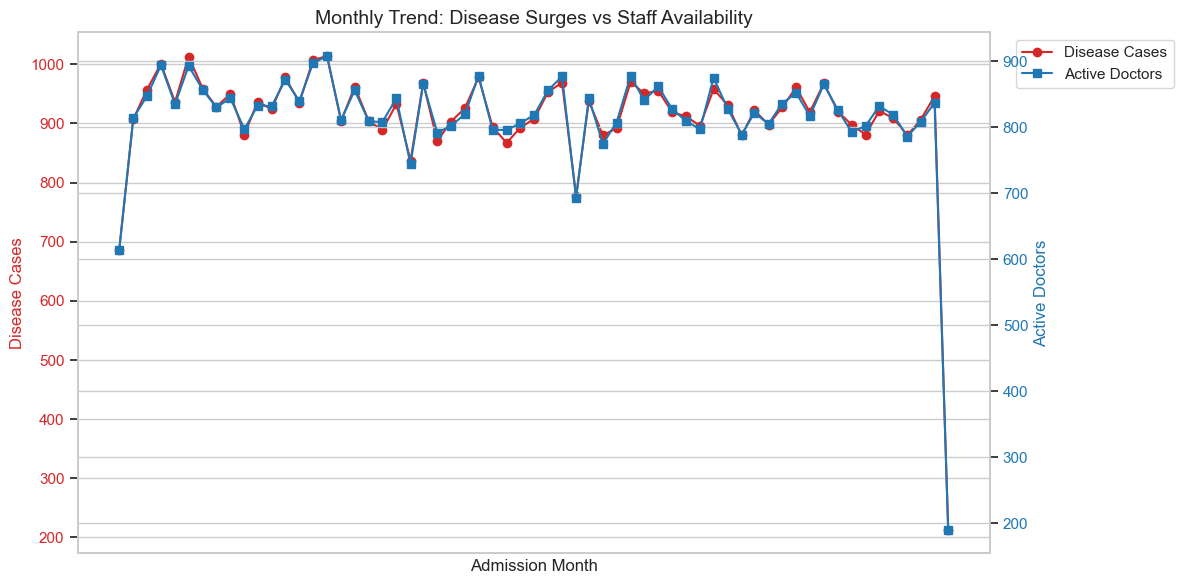

**Insights:**
1. Disease cases peaked in **August 2020** with **1014** reported cases.
2. The lowest staff availability was in **May 2024** with only **190** active doctors.

**Recommendations:**
1. Allocate more staff and resources ahead of **August 2020** in future cycles.
2. Review scheduling practices to avoid low staffing during critical periods like **May 2024**.


In [ ]:
# Extracting Admission_Month
health_1['Admission_Month'] = health_1['Date_of_Admission'].dt.to_period('M').dt.to_timestamp()

# Calculating monthly disease frequency
disease_counts = health_1.groupby('Admission_Month')['Medical_Condition'].count().rename('Disease_Cases')

# Estimating staff availability per month (distinct doctors)
staff_counts = health_1.groupby('Admission_Month')['Doctor'].nunique().rename('Active_Doctors')

# Merging into one DataFrame
trends = pd.concat([disease_counts, staff_counts], axis=1).dropna()

# Plotting Dual-axis line plot
sns.set(style="whitegrid")
fig, ax1 = plt.subplots(figsize=(12, 6))

color1 = 'tab:red'
ax1.set_xlabel('Admission Month')
ax1.set_ylabel('Disease Cases', color=color1)
line1 = ax1.plot(trends.index, trends['Disease_Cases'], color=color1, marker='o', label='Disease Cases')
ax1.tick_params(axis='y', labelcolor=color1)
ax1.set_xticks(range(len(trends.index)))
ax1.set_xticklabels(trends.index.strftime('%b %Y'), rotation=45, ha='right')

# Second axis for staff
ax2 = ax1.twinx()
color2 = 'tab:blue'
ax2.set_ylabel('Active Doctors', color=color2)
line2 = ax2.plot(trends.index, trends['Active_Doctors'], color=color2, marker='s', label='Active Doctors')
ax2.tick_params(axis='y', labelcolor=color2)

# Combining  legends
lines = line1 + line2
labels = [l.get_label() for l in lines]
ax1.legend(lines, labels, loc='upper left', bbox_to_anchor=(1.02, 1))

plt.title("Monthly Trend: Disease Surges vs Staff Availability", fontsize=14)
plt.tight_layout()
plt.show()

# Step 7: Automatically generate insights
insights = []
recommendations = []

# Insight 1: Peak disease month
peak_month = trends['Disease_Cases'].idxmax().strftime('%B %Y')
peak_cases = trends['Disease_Cases'].max()
insights.append(f"1. Disease cases peaked in **{peak_month}** with **{peak_cases}** reported cases.")
recommendations.append(f"1. Allocate more staff and resources ahead of **{peak_month}** in future cycles.")

# Insight 2: Month with lowest staff availability
low_staff_month = trends['Active_Doctors'].idxmin().strftime('%B %Y')
low_staff = trends['Active_Doctors'].min()
insights.append(f"2. The lowest staff availability was in **{low_staff_month}** with only **{low_staff}** active doctors.")
recommendations.append(f"2. Review scheduling practices to avoid low staffing during critical periods like **{low_staff_month}**.")

# Insight 3: Divergence pattern
divergent_months = trends[trends['Disease_Cases'] > trends['Disease_Cases'].mean() * 1.2]
staff_below_avg = divergent_months[divergent_months['Active_Doctors'] < trends['Active_Doctors'].mean()]
if not staff_below_avg.empty:
    sample_month = staff_below_avg.index[0].strftime('%B %Y')
    insights.append(f"3. In **{sample_month}**, disease burden was high while staff availability was below average.")
    recommendations.append(f"3. Build proactive alert systems to flag misalignment between disease surges and staff levels.")

# Step 8: Print insights
print("**Insights:**")
for ins in insights:
    print(ins)

print("\n**Recommendations:**")
for rec in recommendations:
    print(rec)

### Comparing Doctors Workloads

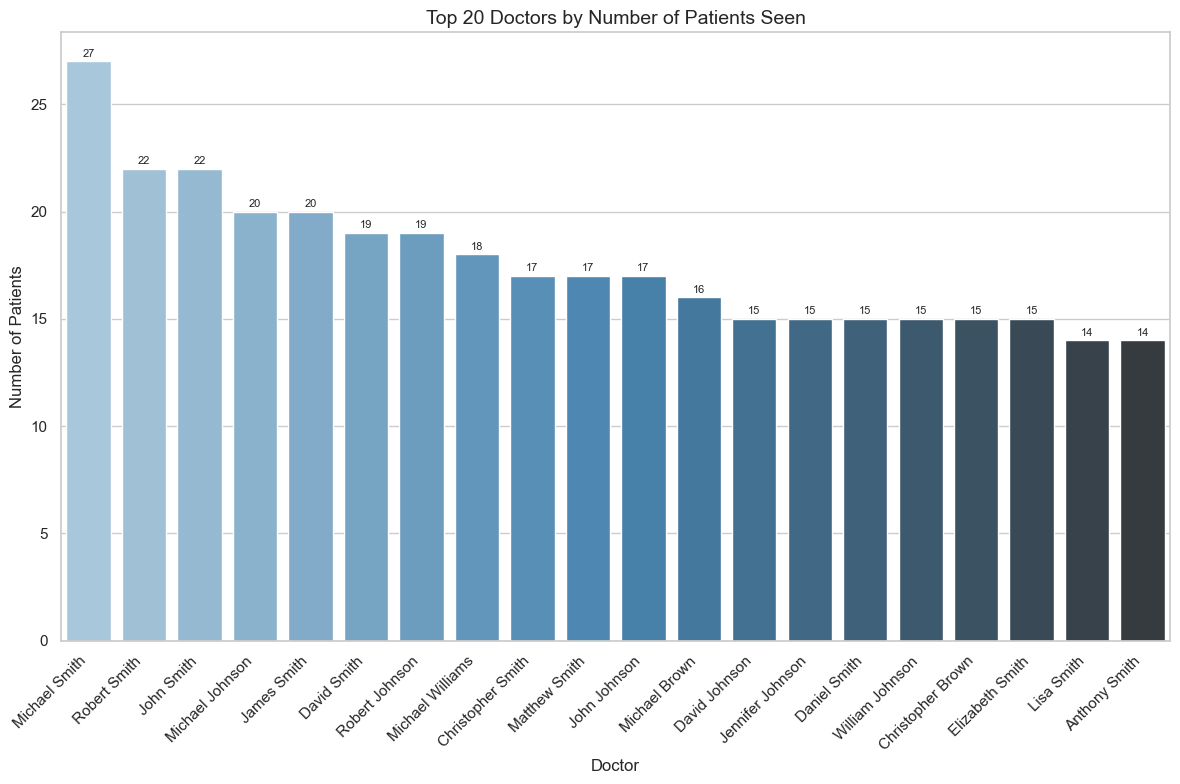

**Insights:**
1. **Michael Smith** attended to the most patients (**27**) in the review period.
2. **David Johnson** had the highest abnormal outcome rate at **53.3%**.
3. **William Johnson** had the highest average billing at **$31279.88** per patient.

**Recommendations:**
1. Consider reducing workload for **Michael Smith** to prevent burnout or quality issues.
2. Investigate **David Johnson**'s treatment or triage practices for quality improvement.
3. Review case complexity and billing justification for **William Johnson** to optimize cost-efficiency.


In [ ]:

# Ensuring correct data types
health_1['Date_of_Admission'] = pd.to_datetime(health_1['Date_of_Admission'], errors='coerce')
health_1['Discharge_Date'] = pd.to_datetime(health_1['Discharge_Date'], errors='coerce')

# Grouping by doctor and calculate metrics
doctor_summary = (
    health_1.groupby('Doctor', observed=True)
    .agg(
        Patients_Seen=('Name', 'count'),
        Avg_Billing=('Billing_Amount', 'mean'),
        Abnormal_Rate=('Abnormal_Flag', 'mean')
    )
    .sort_values(by='Patients_Seen', ascending=False)
    .head(20)  # Top 20 doctors
    .reset_index()
)

# Plotting bar chart
plt.figure(figsize=(12, 8))
ax = sns.barplot(
    data=doctor_summary,
    x='Doctor',
    y='Patients_Seen',
    hue='Doctor',
    palette='Blues_d',
    dodge=False,
    legend=False 
)

plt.title("Top 20 Doctors by Number of Patients Seen", fontsize=14)
plt.xlabel("Doctor")
plt.ylabel("Number of Patients")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Moving legend outside the plot
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge', fontsize=8, padding=2)

plt.show()

# Step 4: Insights & Recommendations
insights = []
recommendations = []

# 1. Doctor with highest patient load
top_doc = doctor_summary.loc[0]
insights.append(
    f"1. **{top_doc['Doctor']}** attended to the most patients (**{top_doc['Patients_Seen']}**) in the review period."
)
recommendations.append(
    f"1. Consider reducing workload for **{top_doc['Doctor']}** to prevent burnout or quality issues."
)

# 2. Doctor with highest abnormal outcome rate
abnormal_doc = doctor_summary.loc[doctor_summary['Abnormal_Rate'].idxmax()]
insights.append(
    f"2. **{abnormal_doc['Doctor']}** had the highest abnormal outcome rate at **{abnormal_doc['Abnormal_Rate']*100:.1f}%**."
)
recommendations.append(
    f"2. Investigate **{abnormal_doc['Doctor']}**'s treatment or triage practices for quality improvement."
)

# 3. Doctor with highest average billing
revenue_doc = doctor_summary.loc[doctor_summary['Avg_Billing'].idxmax()]
insights.append(
    f"3. **{revenue_doc['Doctor']}** had the highest average billing at **${revenue_doc['Avg_Billing']:.2f}** per patient."
)
recommendations.append(
    f"3. Review case complexity and billing justification for **{revenue_doc['Doctor']}** to optimize cost-efficiency."
)

# Step 5: Display Insights & Recommendations
print("**Insights:**")
for ins in insights:
    print(ins)

print("\n**Recommendations:**")
for rec in recommendations:
    print(rec)